<a href="https://colab.research.google.com/github/TheoLpr/NLI_study/blob/main/Comparaison_NLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importation part


In [ ]:
!pip3 install -q --upgrade datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
import datasets
data = datasets.load_dataset("snli")
data = data.rename_column("label", "labels")

test_data = data["test"].filter(lambda _ex: _ex["labels"] != -1)



Downloading:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##For each model we import test predictions and then we display confusion matrices

Probabilistic model

In [ ]:
test_preds_probas=torch.load("/content/gdrive/MyDrive/Colab Notebooks/test_preds_probas")

In [ ]:
test_preds_probas

tensor([2, 0, 2,  ..., 2, 0, 1])

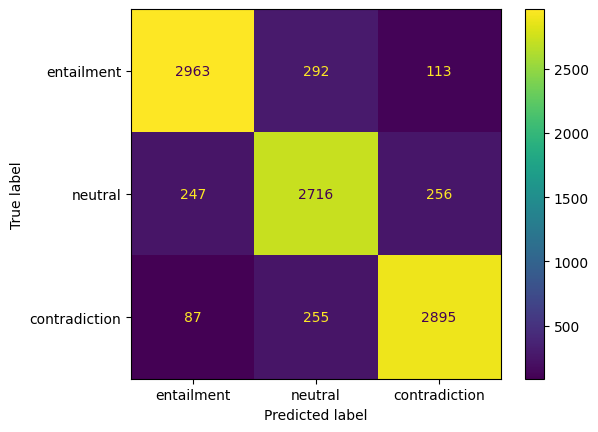

accuracy : 0.8727605863192183


In [ ]:

actual=list(test_data["labels"])

predicted=list(test_preds_probas)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

accuracy=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(test_data["labels"])


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=["entailment","neutral","contradiction"])
disp.plot()

plt.show()

print("accuracy :",accuracy)

Bert model

In [ ]:
test_preds_bert=torch.load("/content/gdrive/MyDrive/Colab Notebooks/test_preds_bert")

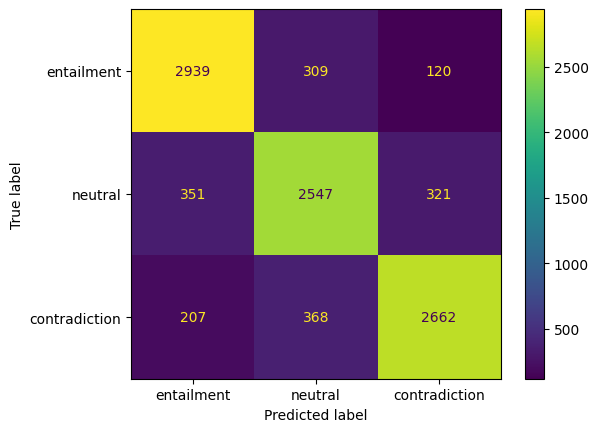

0.8293973941368078


In [ ]:

actual=list(test_data["labels"])

predicted=list(test_preds_bert)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

accuracy=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(test_data["labels"])


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=["entailment","neutral","contradiction"])
disp.plot()

plt.show()

print("accuracy :",accuracy)
plt.savefig("NLI_bert.png")

Multilingual BERT model

In [ ]:

test_preds_multibert=torch.load("/content/gdrive/MyDrive/Colab Notebooks/test_preds_multi")

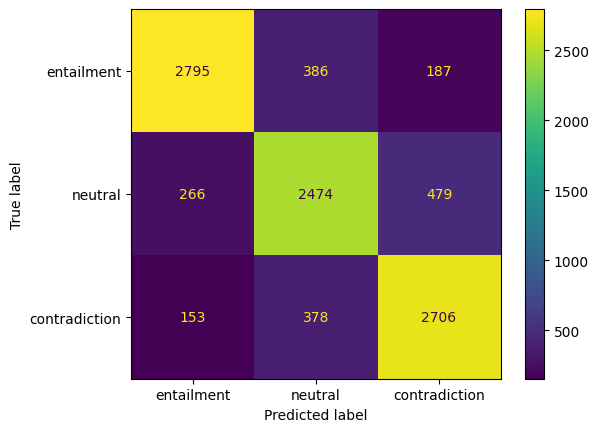

accuracy : 0.8117874592833876


In [ ]:
vactual=list(test_data["labels"])

predicted=list(test_preds_multibert)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

accuracy=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(test_data["labels"])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=["entailment","neutral","contradiction"])
disp.plot()

plt.show()

print("accuracy :",accuracy)

RoBERTa model

In [ ]:
test_preds_roberta=torch.load("/content/gdrive/MyDrive/Colab Notebooks/test_preds_roberta")

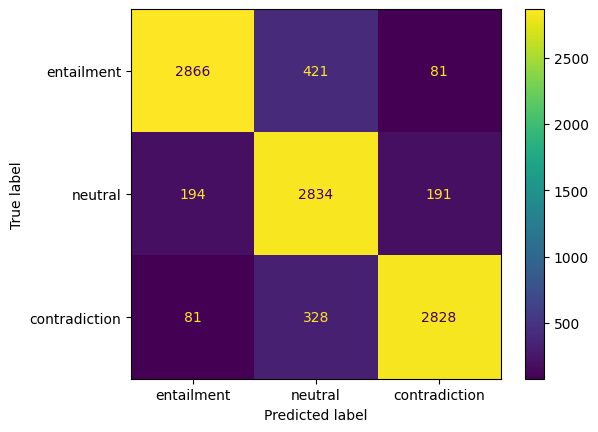

accuracy : 0.8680781758957655


In [ ]:
vactual=list(test_data["labels"])

predicted=list(test_preds_roberta)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

accuracy=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/len(test_data["labels"])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=["entailment","neutral","contradiction"])
disp.plot()

plt.show()

print("accuracy :",accuracy)